<a href="https://colab.research.google.com/github/NP-15/Machine-learning/blob/main/Sessions/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KMeans

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances

X = np.array([[1, 2], [2, 3], [5, 8], [7, 8], [1, 3], [6, 2], [6, 5], [7, 6]])

k = 2

distances_euclidean = euclidean_distances(X, X)

kmeans_euclidean = KMeans(n_clusters=k, init='k-means++')
kmeans_euclidean.fit(distances_euclidean)
labels_euclidean = kmeans_euclidean.labels_
centroids_euclidean = kmeans_euclidean.cluster_centers_

distances_manhattan = manhattan_distances(X, X)

kmeans_manhattan = KMeans(n_clusters=k, init='k-means++')
kmeans_manhattan.fit(distances_manhattan)
labels_manhattan = kmeans_manhattan.labels_
centroids_manhattan = kmeans_manhattan.cluster_centers_

distances_sqeuclidean = euclidean_distances(X, X)**2

kmeans_sqeuclidean = KMeans(n_clusters=k, init='k-means++')
kmeans_sqeuclidean.fit(distances_sqeuclidean)
labels_sqeuclidean = kmeans_sqeuclidean.labels_
centroids_sqeuclidean = kmeans_sqeuclidean.cluster_centers_

distances_cosine = cosine_distances(X, X)

kmeans_cosine = KMeans(n_clusters=k, init='k-means++')
kmeans_cosine.fit(distances_cosine)
labels_cosine = kmeans_cosine.labels_
centroids_cosine = kmeans_cosine.cluster_centers_

print("Euclidean Distance:")
print("Centroids:", centroids_euclidean)
print("Labels:", labels_euclidean)
print("\nManhattan Distance:")
print("Labels:", labels_manhattan)
print("\nSquared Euclidean Distance:")
print("Centroids:", centroids_sqeuclidean)
print("Labels:", labels_sqeuclidean)
print("\nCosine Distance:")
print("Centroids:", centroids_cosine)
print("Labels:", labels_cosine)


Euclidean Distance:
Centroids: [[0.80473785 0.80473785 6.48172623 7.78886629 0.66666667 4.74070838
  5.22941755 6.58341946]
 [6.74768767 5.46564264 2.81469346 2.64900804 6.28115243 3.85772614
  2.14775378 2.07314926]]
Labels: [0 0 1 1 0 1 1 1]

Manhattan Distance:
Labels: [0 0 1 1 0 1 1 1]

Squared Euclidean Distance:
Centroids: [[ 7.   5.  41.  55.   7.  17.  23.  37. ]
 [52.5 34.5  5.5  4.5 44.  25.   5.5  3.5]]
Labels: [0 0 1 1 0 0 1 1]

Cosine Distance:
Centroids: [[0.03098102 0.01864103 0.02019388 0.02201915 0.06332172 0.20179231
  0.04816843 0.04489966]
 [0.29289322 0.21064778 0.22903825 0.13730203 0.4        0.
  0.06875722 0.07390764]]
Labels: [0 0 0 0 0 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Plotting the graphs

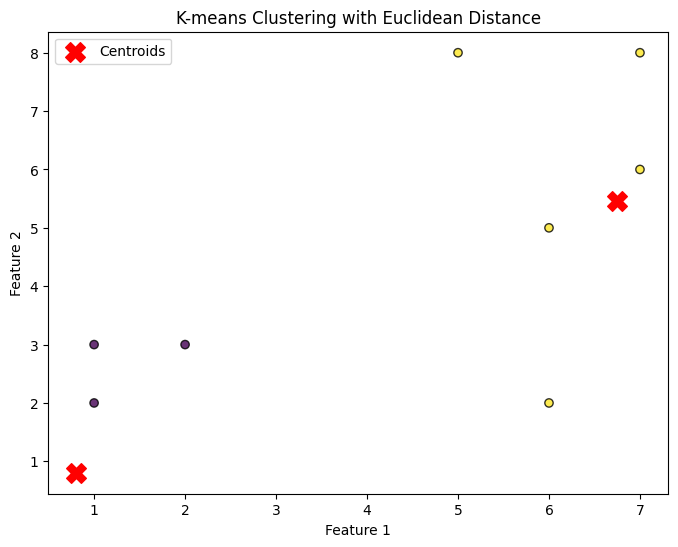

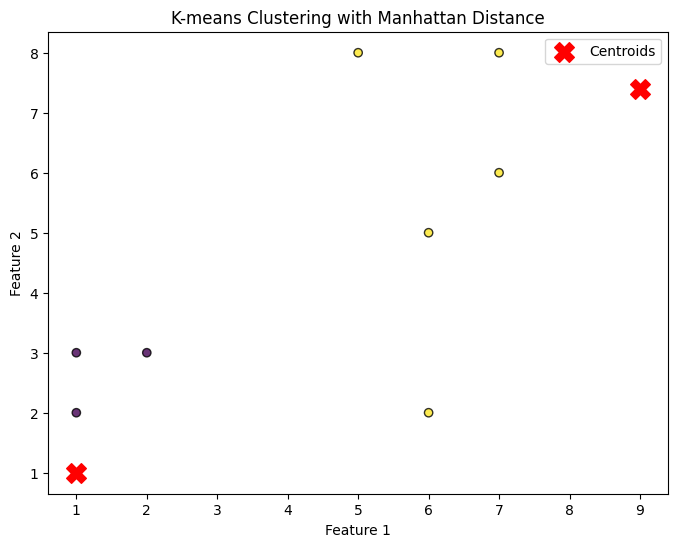

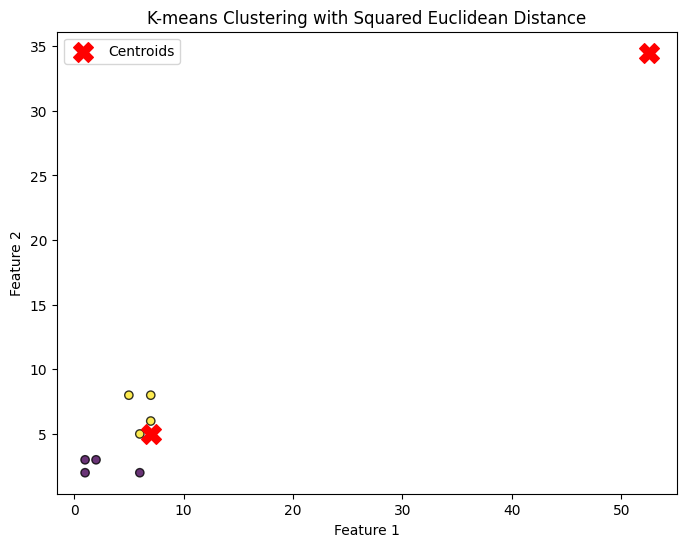

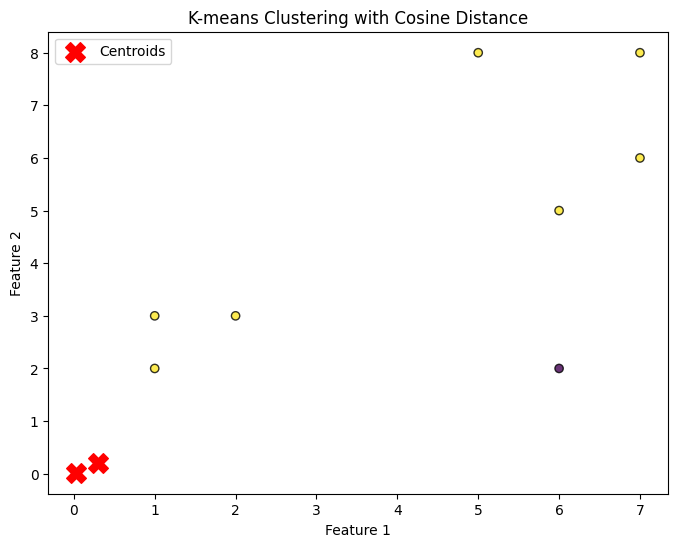

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(X, centroids, labels, distance_measure):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.8)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
    plt.title(f'K-means Clustering with {distance_measure} Distance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Euclidean distance
plot_clusters(X, centroids_euclidean, labels_euclidean, 'Euclidean')

# Manhattan distance
plot_clusters(X, centroids_manhattan, labels_manhattan, 'Manhattan')

# Squared Euclidean distance
plot_clusters(X, centroids_sqeuclidean, labels_sqeuclidean, 'Squared Euclidean')

# Cosine distance
plot_clusters(X, centroids_cosine, labels_cosine, 'Cosine')


## Images

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


### Reconstructing the image

Error loading image using 'load_sample_image': Cannot find sample image: /content/drive/MyDrive/Machine-learning-main/assets/skyscraper.jpg


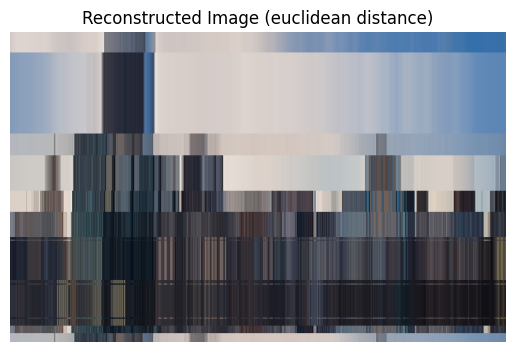

Silhouette Score (euclidean distance): 0.24278408330563842
Sum of Squared Errors (euclidean distance): 18275.457301976265


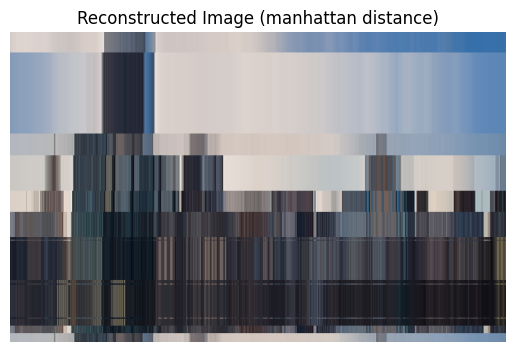

Silhouette Score (manhattan distance): 0.24278408330563842
Sum of Squared Errors (manhattan distance): 18275.457301976265


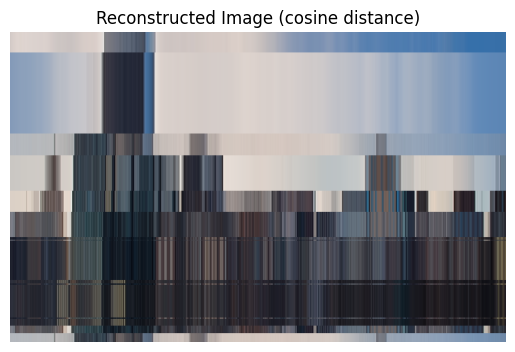

Silhouette Score (cosine distance): 0.24278408330563842
Sum of Squared Errors (cosine distance): 18275.457301976265


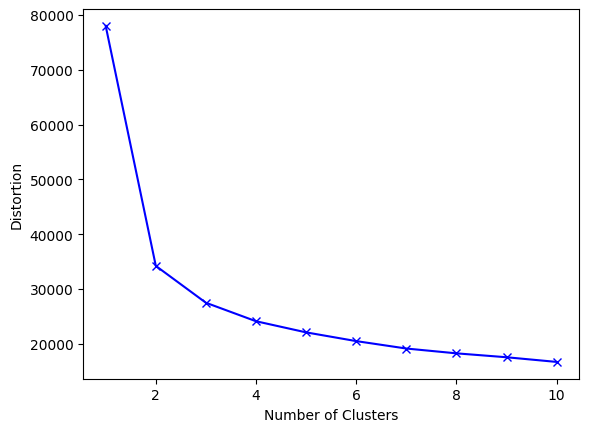

In [4]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
from PIL import Image

def calculate_sse(image_data, labels, centroids):
    num_pixels = image_data.shape[0]
    sse = 0
    for i in range(num_pixels):
        cluster_label = labels[i]
        centroid = centroids[cluster_label]
        pixel_diff = image_data[i] - centroid
        squared_error = np.dot(pixel_diff, pixel_diff)
        sse += squared_error
    return sse


try:
    image = load_sample_image("/content/drive/MyDrive/Machine-learning-main/assets/skyscraper.jpg")
    plt.imshow(image)
    plt.axis('off')
    plt.title('Original Image')
    plt.show()
except Exception as e:
    print("Error loading image using 'load_sample_image':", e)
    image = Image.open("/content/drive/MyDrive/Machine-learning-main/assets/skyscraper.jpg")


image_data = np.array(image) / 255.0
n_dimensions = image_data.ndim

if n_dimensions == 3:
    X = np.asarray(image_data)
elif n_dimensions == 4:
    X = np.asarray(image_data)[:, :, :3]
else:
    raise ValueError("Invalid image dimensions")

X_flat = X.reshape(-1, X.shape[1] * X.shape[2])


def kmeans_clustering(X, k, distance_measure):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    return labels, centroids


k = 8
distance_measures = ['euclidean', 'manhattan', 'cosine']
for measure in distance_measures:
    labels, centroids = kmeans_clustering(X_flat, k, measure)

    reconstructed_image = centroids[labels].reshape(X.shape)
    reconstructed_image = np.clip(reconstructed_image, 0, 1)

    plt.imshow(reconstructed_image)
    plt.axis('off')
    plt.title(f'Reconstructed Image ({measure} distance)')
    plt.show()

    silhouette_avg = silhouette_score(X_flat, labels, metric='euclidean')
    print(f'Silhouette Score ({measure} distance): {silhouette_avg}')

    sse = calculate_sse(X_flat, labels, centroids)
    print(f'Sum of Squared Errors ({measure} distance): {sse}')

distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X_flat)
    distortions.append(kmeans.inertia_)

plt.plot(K_range, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

### Image compression using optimum k-value

Error loading image using 'load_sample_image': Cannot find sample image: /content/drive/MyDrive/Machine-learning-main/assets/skyscraper.jpg


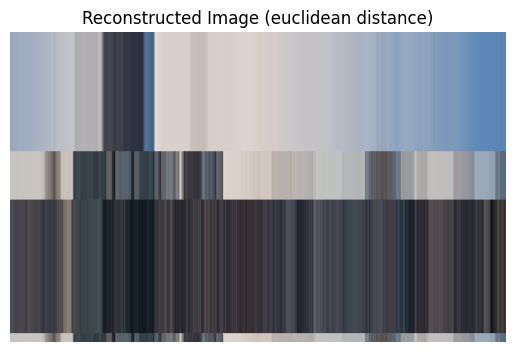

Silhouette Score (euclidean distance): 0.3982543140803249
Sum of Squared Errors (euclidean distance): 27504.98738605613


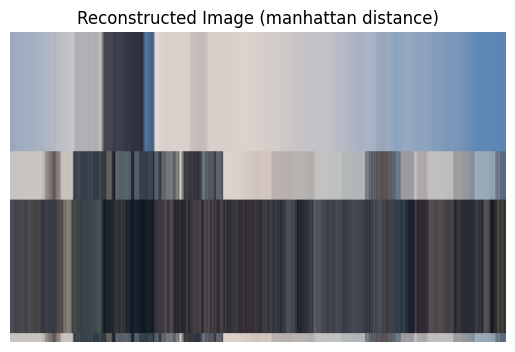

Silhouette Score (manhattan distance): 0.3982543140803249
Sum of Squared Errors (manhattan distance): 27504.98738605613


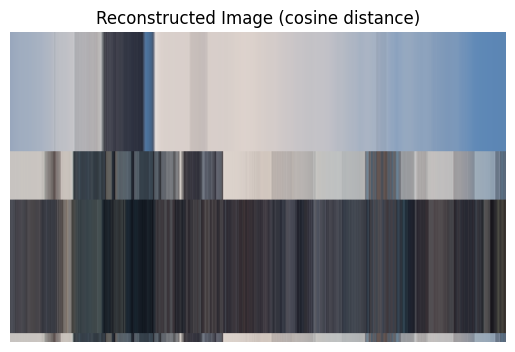

Silhouette Score (cosine distance): 0.3982543140803249
Sum of Squared Errors (cosine distance): 27504.98738605613


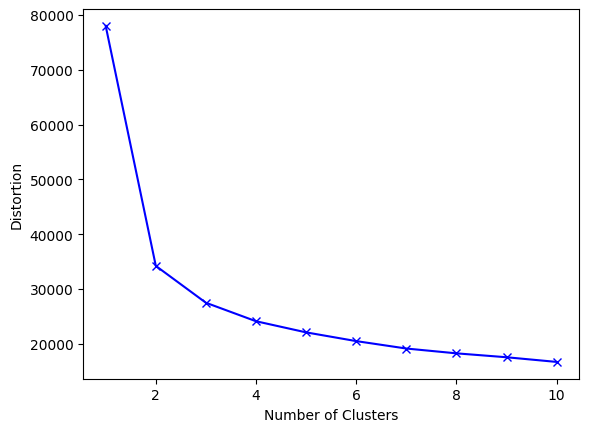

In [5]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
from PIL import Image

def calculate_sse(image_data, labels, centroids):
    num_pixels = image_data.shape[0]
    sse = 0
    for i in range(num_pixels):
        cluster_label = labels[i]
        centroid = centroids[cluster_label]
        pixel_diff = image_data[i] - centroid
        squared_error = np.dot(pixel_diff, pixel_diff)
        sse += squared_error
    return sse


try:
    image = load_sample_image("/content/drive/MyDrive/Machine-learning-main/assets/skyscraper.jpg")
    plt.imshow(image)
    plt.axis('off')
    plt.title('Original Image')
    plt.show()
except Exception as e:
    print("Error loading image using 'load_sample_image':", e)
    image = Image.open("/content/drive/MyDrive/Machine-learning-main/assets/skyscraper.jpg")


image_data = np.array(image) / 255.0
n_dimensions = image_data.ndim

if n_dimensions == 3:
    X = np.asarray(image_data)
elif n_dimensions == 4:
    X = np.asarray(image_data)[:, :, :3]
else:
    raise ValueError("Invalid image dimensions")

X_flat = X.reshape(-1, X.shape[1] * X.shape[2])


def kmeans_clustering(X, k, distance_measure):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    return labels, centroids


k = 3
distance_measures = ['euclidean', 'manhattan', 'cosine']
for measure in distance_measures:
    labels, centroids = kmeans_clustering(X_flat, k, measure)

    reconstructed_image = centroids[labels].reshape(X.shape)
    reconstructed_image = np.clip(reconstructed_image, 0, 1)

    plt.imshow(reconstructed_image)
    plt.axis('off')
    plt.title(f'Reconstructed Image ({measure} distance)')
    plt.show()

    silhouette_avg = silhouette_score(X_flat, labels, metric='euclidean')
    print(f'Silhouette Score ({measure} distance): {silhouette_avg}')

    sse = calculate_sse(X_flat, labels, centroids)
    print(f'Sum of Squared Errors ({measure} distance): {sse}')

distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X_flat)
    distortions.append(kmeans.inertia_)

plt.plot(K_range, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()